In [1]:
import torch
import torchvision
import torch.nn as nn
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [3]:
transform = transforms.Compose([transforms.ToTensor()])

train_set = torchvision.datasets.MNIST (root = "./dataset", train = True, download = False, transform = transform)
test_set = torchvision.datasets.MNIST (root = "./dataset", train = False, download = False, transform = transform)

train_loader = torch.utils.data.DataLoader (train_set, batch_size = 64, shuffle = True)
test_loader = torch.utils.data.DataLoader (test_set, batch_size = 32, shuffle = False)

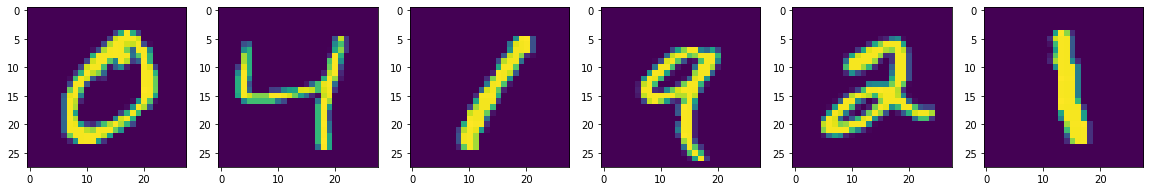

In [4]:
# visualize data
fig = plt.figure (figsize = (20, 20))
for i in range(1, 7):
    img = transforms.ToPILImage(mode='L')(train_set[i][0])
    fig.add_subplot(1, 6, i)
    plt.imshow(img)
plt.show()

In [5]:
class Model(nn.Module):
    
    def __init__(self):
        super(Model, self).__init__()
        
        self.conv_1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.conv_2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        
        self.max_pool2d = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.linear_1 = nn.Linear(7 * 7 * 64, 128)
        self.linear_2 = nn.Linear(128, 10)

        self.relu = nn.ReLU()

    def forward(self, x):
        
        x = self.conv_1(x)
        x = self.relu(x)
        x = self.max_pool2d(x)
        
        x = self.conv_2(x)
        x = self.relu(x)
        x = self.max_pool2d(x)
        
        x = x.reshape(x.size(0), -1)
        
        x = self.linear_1(x)
        x = self.relu(x)
        
        pred = self.linear_2(x)

        return pred

In [9]:
model = Model()
model.to(device)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0003)
epochs = 1000

In [10]:
model

Model(
  (conv_1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv_2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (max_pool2d): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (linear_1): Linear(in_features=3136, out_features=128, bias=True)
  (linear_2): Linear(in_features=128, out_features=10, bias=True)
  (relu): ReLU()
)

In [11]:
train_loss = list()
val_loss = list()
gradien_vector = []

for epoch in range(epochs):
    total_train_loss = 0
    total_val_loss = 0

    model.train()
    # training
    for itr, (image, label) in enumerate(train_loader):

        if (torch.cuda.is_available()):
            image = image.cuda()
            label = label.cuda()

        optimizer.zero_grad()

        pred = model(image)
        pred.to (device)

        loss = criterion(pred, label)
        total_train_loss += loss.item()

        loss.backward()
        optimizer.step()

    total_train_loss = total_train_loss / (itr + 1)
    train_loss.append(total_train_loss)
    
    print('\nEpoch: {}/{}, Train Loss: {:.8f}'.format(epoch + 1, epochs, total_train_loss))

    
    #Gradients
    g_2 = []
    for name, param in model.named_parameters():
        if param.requires_grad and "bias" not in name:
            #print (name, param.grad.data)
            g_2.append(torch.flatten(param.grad.data))
    print(torch.norm(torch.cat([g_2[0],g_2[1],g_2[2],g_2[3]],dim=0)))
    gradien_vector.append(torch.norm(torch.cat([g_2[0],g_2[1],g_2[2],g_2[3]],dim=0)).item())


Epoch: 1/1000, Train Loss: 0.31947321
tensor(2.8383, device='cuda:0')

Epoch: 2/1000, Train Loss: 0.08346837
tensor(1.2766, device='cuda:0')

Epoch: 3/1000, Train Loss: 0.05897250
tensor(0.1035, device='cuda:0')

Epoch: 4/1000, Train Loss: 0.04563795
tensor(1.5230, device='cuda:0')

Epoch: 5/1000, Train Loss: 0.03829389
tensor(1.8390, device='cuda:0')

Epoch: 6/1000, Train Loss: 0.03199950
tensor(2.0242, device='cuda:0')

Epoch: 7/1000, Train Loss: 0.02601546
tensor(0.4244, device='cuda:0')

Epoch: 8/1000, Train Loss: 0.02221000
tensor(0.1217, device='cuda:0')

Epoch: 9/1000, Train Loss: 0.01889801
tensor(0.5213, device='cuda:0')

Epoch: 10/1000, Train Loss: 0.01617112
tensor(0.2028, device='cuda:0')

Epoch: 11/1000, Train Loss: 0.01299647
tensor(0.0827, device='cuda:0')

Epoch: 12/1000, Train Loss: 0.01139322
tensor(0.4471, device='cuda:0')

Epoch: 13/1000, Train Loss: 0.00872992
tensor(1.0675, device='cuda:0')

Epoch: 14/1000, Train Loss: 0.00792446
tensor(0.0195, device='cuda:0')




Epoch: 113/1000, Train Loss: 0.00000044
tensor(4.4723e-10, device='cuda:0')

Epoch: 114/1000, Train Loss: 0.00000030
tensor(1.1614e-08, device='cuda:0')

Epoch: 115/1000, Train Loss: 0.00000021
tensor(8.2909e-05, device='cuda:0')

Epoch: 116/1000, Train Loss: 0.00000013
tensor(3.1419e-06, device='cuda:0')

Epoch: 117/1000, Train Loss: 0.00000009
tensor(1.2609e-05, device='cuda:0')

Epoch: 118/1000, Train Loss: 0.00000006
tensor(6.4756e-07, device='cuda:0')

Epoch: 119/1000, Train Loss: 0.00000004
tensor(1.4430e-06, device='cuda:0')

Epoch: 120/1000, Train Loss: 0.00000002
tensor(7.7935e-10, device='cuda:0')

Epoch: 121/1000, Train Loss: 0.00000002
tensor(1.3942e-06, device='cuda:0')

Epoch: 122/1000, Train Loss: 0.00320176
tensor(1.4779e-06, device='cuda:0')

Epoch: 123/1000, Train Loss: 0.00084132
tensor(1.0521e-08, device='cuda:0')

Epoch: 124/1000, Train Loss: 0.00001792
tensor(9.9277e-06, device='cuda:0')

Epoch: 125/1000, Train Loss: 0.00000526
tensor(7.6925e-07, device='cuda:0')


Epoch: 221/1000, Train Loss: 0.00000000
tensor(1.6276e-06, device='cuda:0')

Epoch: 222/1000, Train Loss: 0.00000000
tensor(8.3455e-11, device='cuda:0')

Epoch: 223/1000, Train Loss: 0.00000000
tensor(3.0206e-09, device='cuda:0')

Epoch: 224/1000, Train Loss: 0.00000000
tensor(2.3925e-11, device='cuda:0')

Epoch: 225/1000, Train Loss: 0.00000000
tensor(9.8446e-13, device='cuda:0')

Epoch: 226/1000, Train Loss: 0.00295394
tensor(0.0269, device='cuda:0')

Epoch: 227/1000, Train Loss: 0.00213637
tensor(4.5648e-08, device='cuda:0')

Epoch: 228/1000, Train Loss: 0.00010514
tensor(1.9921e-05, device='cuda:0')

Epoch: 229/1000, Train Loss: 0.00076218
tensor(0.0196, device='cuda:0')

Epoch: 230/1000, Train Loss: 0.00006972
tensor(0.0001, device='cuda:0')

Epoch: 231/1000, Train Loss: 0.00000415
tensor(1.0637e-05, device='cuda:0')

Epoch: 232/1000, Train Loss: 0.00000262
tensor(6.1970e-12, device='cuda:0')

Epoch: 233/1000, Train Loss: 0.00000081
tensor(6.0696e-09, device='cuda:0')

Epoch: 234


Epoch: 328/1000, Train Loss: 0.00000000
tensor(7.4227e-07, device='cuda:0')

Epoch: 329/1000, Train Loss: 0.00000000
tensor(9.9423e-13, device='cuda:0')

Epoch: 330/1000, Train Loss: 0.00000000
tensor(7.4793e-09, device='cuda:0')

Epoch: 331/1000, Train Loss: 0.00000000
tensor(7.0598e-14, device='cuda:0')

Epoch: 332/1000, Train Loss: 0.00000000
tensor(2.6044e-09, device='cuda:0')

Epoch: 333/1000, Train Loss: 0.00000000
tensor(4.9914e-15, device='cuda:0')

Epoch: 334/1000, Train Loss: 0.00000000
tensor(1.0967e-07, device='cuda:0')

Epoch: 335/1000, Train Loss: 0.00503621
tensor(0.0048, device='cuda:0')

Epoch: 336/1000, Train Loss: 0.00087370
tensor(2.0275e-06, device='cuda:0')

Epoch: 337/1000, Train Loss: 0.00063957
tensor(9.7195e-08, device='cuda:0')

Epoch: 338/1000, Train Loss: 0.00006037
tensor(4.3445e-14, device='cuda:0')

Epoch: 339/1000, Train Loss: 0.00002796
tensor(3.7520e-09, device='cuda:0')

Epoch: 340/1000, Train Loss: 0.00000300
tensor(6.2084e-11, device='cuda:0')

Ep


Epoch: 435/1000, Train Loss: 0.00000000
tensor(3.9187e-09, device='cuda:0')

Epoch: 436/1000, Train Loss: 0.00000000
tensor(7.9216e-13, device='cuda:0')

Epoch: 437/1000, Train Loss: 0.00316738
tensor(2.4766e-06, device='cuda:0')

Epoch: 438/1000, Train Loss: 0.00051907
tensor(8.2911e-11, device='cuda:0')

Epoch: 439/1000, Train Loss: 0.00015861
tensor(3.3098e-15, device='cuda:0')

Epoch: 440/1000, Train Loss: 0.00000306
tensor(0.0018, device='cuda:0')

Epoch: 441/1000, Train Loss: 0.00000034
tensor(1.4034e-07, device='cuda:0')

Epoch: 442/1000, Train Loss: 0.00000023
tensor(1.4845e-07, device='cuda:0')

Epoch: 443/1000, Train Loss: 0.00000017
tensor(4.4563e-10, device='cuda:0')

Epoch: 444/1000, Train Loss: 0.00000012
tensor(1.1868e-13, device='cuda:0')

Epoch: 445/1000, Train Loss: 0.00000009
tensor(5.1975e-16, device='cuda:0')

Epoch: 446/1000, Train Loss: 0.00000007
tensor(2.0092e-14, device='cuda:0')

Epoch: 447/1000, Train Loss: 0.00000005
tensor(1.3377e-11, device='cuda:0')

Ep


Epoch: 542/1000, Train Loss: 0.00000000
tensor(6.7557e-07, device='cuda:0')

Epoch: 543/1000, Train Loss: 0.00000000
tensor(5.4442e-06, device='cuda:0')

Epoch: 544/1000, Train Loss: 0.00000000
tensor(1.9323e-12, device='cuda:0')

Epoch: 545/1000, Train Loss: 0.00004749
tensor(5.3049e-06, device='cuda:0')

Epoch: 546/1000, Train Loss: 0.00477893
tensor(6.5138e-09, device='cuda:0')

Epoch: 547/1000, Train Loss: 0.00042378
tensor(1.7404e-18, device='cuda:0')

Epoch: 548/1000, Train Loss: 0.00109315
tensor(6.8599e-16, device='cuda:0')

Epoch: 549/1000, Train Loss: 0.00104127
tensor(2.6010e-07, device='cuda:0')

Epoch: 550/1000, Train Loss: 0.00008294
tensor(5.3404e-12, device='cuda:0')

Epoch: 551/1000, Train Loss: 0.00000085
tensor(5.5520e-11, device='cuda:0')

Epoch: 552/1000, Train Loss: 0.00000030
tensor(6.0099e-11, device='cuda:0')

Epoch: 553/1000, Train Loss: 0.00000020
tensor(1.9382e-11, device='cuda:0')

Epoch: 554/1000, Train Loss: 0.00000014
tensor(2.0850e-12, device='cuda:0')


Epoch: 649/1000, Train Loss: 0.00016947
tensor(1.0013e-07, device='cuda:0')

Epoch: 650/1000, Train Loss: 0.00191161
tensor(1.7127e-14, device='cuda:0')

Epoch: 651/1000, Train Loss: 0.00094385
tensor(7.4908e-15, device='cuda:0')

Epoch: 652/1000, Train Loss: 0.00045452
tensor(0.0002, device='cuda:0')

Epoch: 653/1000, Train Loss: 0.00014818
tensor(1.8883e-12, device='cuda:0')

Epoch: 654/1000, Train Loss: 0.00068185
tensor(1.7266e-06, device='cuda:0')

Epoch: 655/1000, Train Loss: 0.00012159
tensor(1.1100e-08, device='cuda:0')

Epoch: 656/1000, Train Loss: 0.00009528
tensor(7.8554e-13, device='cuda:0')

Epoch: 657/1000, Train Loss: 0.00069133
tensor(8.2157e-17, device='cuda:0')

Epoch: 658/1000, Train Loss: 0.00050082
tensor(2.4505e-08, device='cuda:0')

Epoch: 659/1000, Train Loss: 0.00068907
tensor(6.6864e-15, device='cuda:0')

Epoch: 660/1000, Train Loss: 0.00044114
tensor(3.0070e-13, device='cuda:0')

Epoch: 661/1000, Train Loss: 0.00052101
tensor(1.2421e-08, device='cuda:0')

Ep


Epoch: 756/1000, Train Loss: 0.00089630
tensor(1.6080e-09, device='cuda:0')

Epoch: 757/1000, Train Loss: 0.00050899
tensor(7.2070e-10, device='cuda:0')

Epoch: 758/1000, Train Loss: 0.00003691
tensor(1.7366e-07, device='cuda:0')

Epoch: 759/1000, Train Loss: 0.00032444
tensor(5.6888e-09, device='cuda:0')

Epoch: 760/1000, Train Loss: 0.00000258
tensor(3.6584e-11, device='cuda:0')

Epoch: 761/1000, Train Loss: 0.00000022
tensor(4.8648e-19, device='cuda:0')

Epoch: 762/1000, Train Loss: 0.00000006
tensor(1.3746e-15, device='cuda:0')

Epoch: 763/1000, Train Loss: 0.00000004
tensor(2.3234e-08, device='cuda:0')

Epoch: 764/1000, Train Loss: 0.00000003
tensor(1.7867e-16, device='cuda:0')

Epoch: 765/1000, Train Loss: 0.00000002
tensor(1.9462e-09, device='cuda:0')

Epoch: 766/1000, Train Loss: 0.00000001
tensor(4.8427e-21, device='cuda:0')

Epoch: 767/1000, Train Loss: 0.00000001
tensor(7.3369e-19, device='cuda:0')

Epoch: 768/1000, Train Loss: 0.00000001
tensor(8.3456e-15, device='cuda:0')


Epoch: 863/1000, Train Loss: 0.00000000
tensor(5.0430e-14, device='cuda:0')

Epoch: 864/1000, Train Loss: 0.00000000
tensor(2.0486e-14, device='cuda:0')

Epoch: 865/1000, Train Loss: 0.00000000
tensor(3.1178e-14, device='cuda:0')

Epoch: 866/1000, Train Loss: 0.00000000
tensor(4.3543e-16, device='cuda:0')

Epoch: 867/1000, Train Loss: 0.00000000
tensor(5.7715e-19, device='cuda:0')

Epoch: 868/1000, Train Loss: 0.00000000
tensor(6.5675e-12, device='cuda:0')

Epoch: 869/1000, Train Loss: 0.00000000
tensor(1.3167e-19, device='cuda:0')

Epoch: 870/1000, Train Loss: 0.00000000
tensor(2.7915e-17, device='cuda:0')

Epoch: 871/1000, Train Loss: 0.00000000
tensor(5.8870e-12, device='cuda:0')

Epoch: 872/1000, Train Loss: 0.00000000
tensor(4.4723e-17, device='cuda:0')

Epoch: 873/1000, Train Loss: 0.00000000
tensor(4.7629e-12, device='cuda:0')

Epoch: 874/1000, Train Loss: 0.00000000
tensor(2.0583e-18, device='cuda:0')

Epoch: 875/1000, Train Loss: 0.00000000
tensor(2.1900e-13, device='cuda:0')


Epoch: 971/1000, Train Loss: 0.00000000
tensor(1.2285e-14, device='cuda:0')

Epoch: 972/1000, Train Loss: 0.00000000
tensor(1.0543e-18, device='cuda:0')

Epoch: 973/1000, Train Loss: 0.00000000
tensor(0., device='cuda:0')

Epoch: 974/1000, Train Loss: 0.00000000
tensor(7.9142e-17, device='cuda:0')

Epoch: 975/1000, Train Loss: 0.00065203
tensor(3.5265e-20, device='cuda:0')

Epoch: 976/1000, Train Loss: 0.00202568
tensor(6.2183e-10, device='cuda:0')

Epoch: 977/1000, Train Loss: 0.00000460
tensor(1.0908e-20, device='cuda:0')

Epoch: 978/1000, Train Loss: 0.00000010
tensor(1.7564e-19, device='cuda:0')

Epoch: 979/1000, Train Loss: 0.00000001
tensor(1.7867e-11, device='cuda:0')

Epoch: 980/1000, Train Loss: 0.00000001
tensor(6.8800e-13, device='cuda:0')

Epoch: 981/1000, Train Loss: 0.00000001
tensor(1.4210e-15, device='cuda:0')

Epoch: 982/1000, Train Loss: 0.00000001
tensor(4.0224e-09, device='cuda:0')

Epoch: 983/1000, Train Loss: 0.00000000
tensor(9.8733e-10, device='cuda:0')

Epoch:

In [29]:
g_v = [x for x in gradien_vector if x < 0.00000000005]

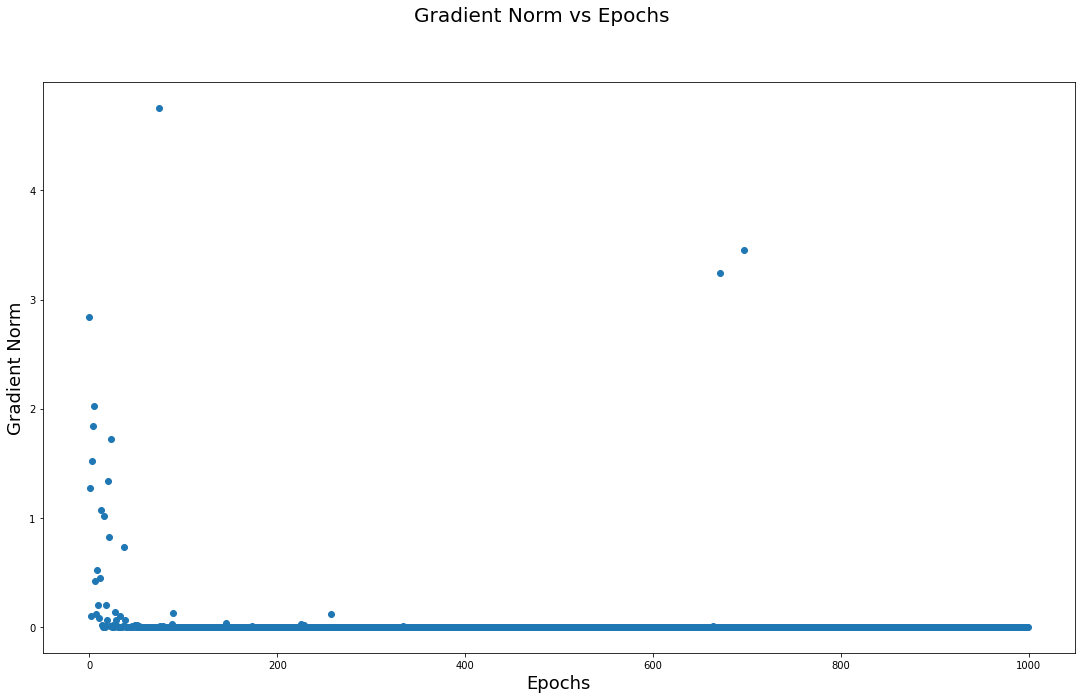

In [14]:
import numpy as np
x = np.arange(len(gradien_vector))
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.suptitle('Gradient Norm vs Epochs', fontsize=20)
plt.xlabel('Epochs', fontsize=18)
plt.ylabel('Gradient Norm', fontsize=18)
plt.scatter(x,gradien_vector)
#plt.savefig('scatterplot_gradient norm vs epochs1.pdf')

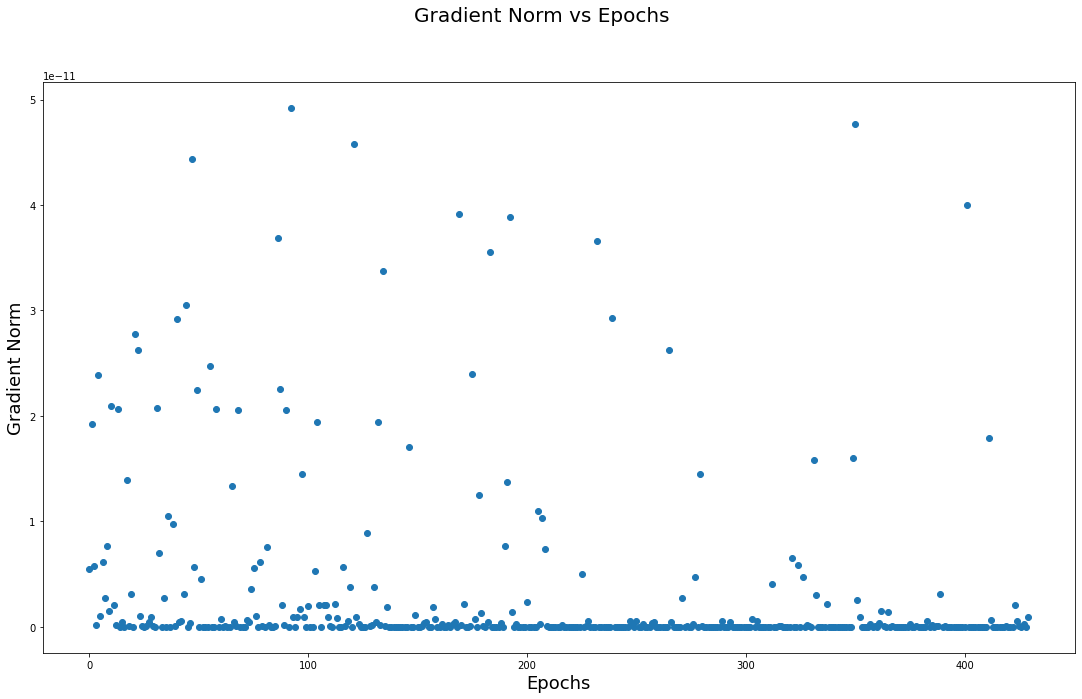

In [31]:
x = np.arange(len(g_v))
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.suptitle('Gradient Norm vs Epochs', fontsize=20)
plt.xlabel('Epochs', fontsize=18)
plt.ylabel('Gradient Norm', fontsize=18)
plt.scatter(x,g_v)
plt.savefig('scatterplot_gradient norm vs epochs1.pdf')